In [1]:
import pandas as pd
import dateutil
import datetime
import os,sys,math,time

## IDR to USD rates from 2006 until 2023

In [20]:
data = pd.read_csv("/Users/athanasioskaravangelis/Desktop/RSM BAM/Workshop/pko_forecasting/data/IDR_USD_daily.csv")

In [21]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-28,11441.0,11565.0,11338.0,11448.0,11448.0,0.0
1,2001-06-29,11370.0,11510.0,11265.0,11390.0,11390.0,0.0
2,2001-07-02,11315.0,11490.0,11215.0,11320.0,11320.0,0.0
3,2001-07-03,11330.0,11455.0,11188.0,11322.0,11322.0,0.0
4,2001-07-04,11355.0,11465.0,11251.0,11365.0,11365.0,0.0


In [22]:
# find average Price for every month, group by month and year in the date column

data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year


data.groupby(['Month','Year'])['Close'].mean()

#now sort like 1/2006, 2/2006, 3/2006 etc 
df_with_average = data.groupby(['Month','Year'])['Close'].mean().reset_index().sort_values(by=['Year','Month'])

In [23]:
# keep dates after month 1 and year 2006
df_with_average = df_with_average[df_with_average['Year']>2005]
df_with_average['Close'] = 1/df_with_average['Close']
df_with_average

,Month,Year,Close
4,1,2006,0.000106
27,2,2006,0.000108
49,3,2006,0.000109
71,4,2006,0.000112
93,5,2006,0.000111
...,...,...,...
202,9,2023,0.000065
225,10,2023,0.000064
248,11,2023,0.000064
271,12,2023,0.000065


In [24]:
# create a new csv file with columns Date(month+year like 01/2006), Price
df_with_average['Date'] = df_with_average['Month'].astype(str) + "/" + df_with_average['Year'].astype(str)
df_with_average = df_with_average[['Date','Close']]
df_with_average['Close'] = df_with_average['Close'].round(9)
df_with_average

/var/folders/35/tbpcvh252s9dy7dhvwv499800000gn/T/ipykernel_12342/3155894043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_average['Close'] = df_with_average['Close'].round(9)


,Date,Close
4,1/2006,0.000106
27,2/2006,0.000108
49,3/2006,0.000109
71,4/2006,0.000112
93,5/2006,0.000111
...,...,...
202,9/2023,0.000065
225,10/2023,0.000064
248,11/2023,0.000064
271,12/2023,0.000065


In [ ]:
df_with_average.to_excel('IDR_USD_average_exchange_rates.xlsx',index=False)

/var/folders/35/tbpcvh252s9dy7dhvwv499800000gn/T/ipykernel_8725/3424526000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_average['Date'] = pd.to_datetime(df_with_average['Date'])


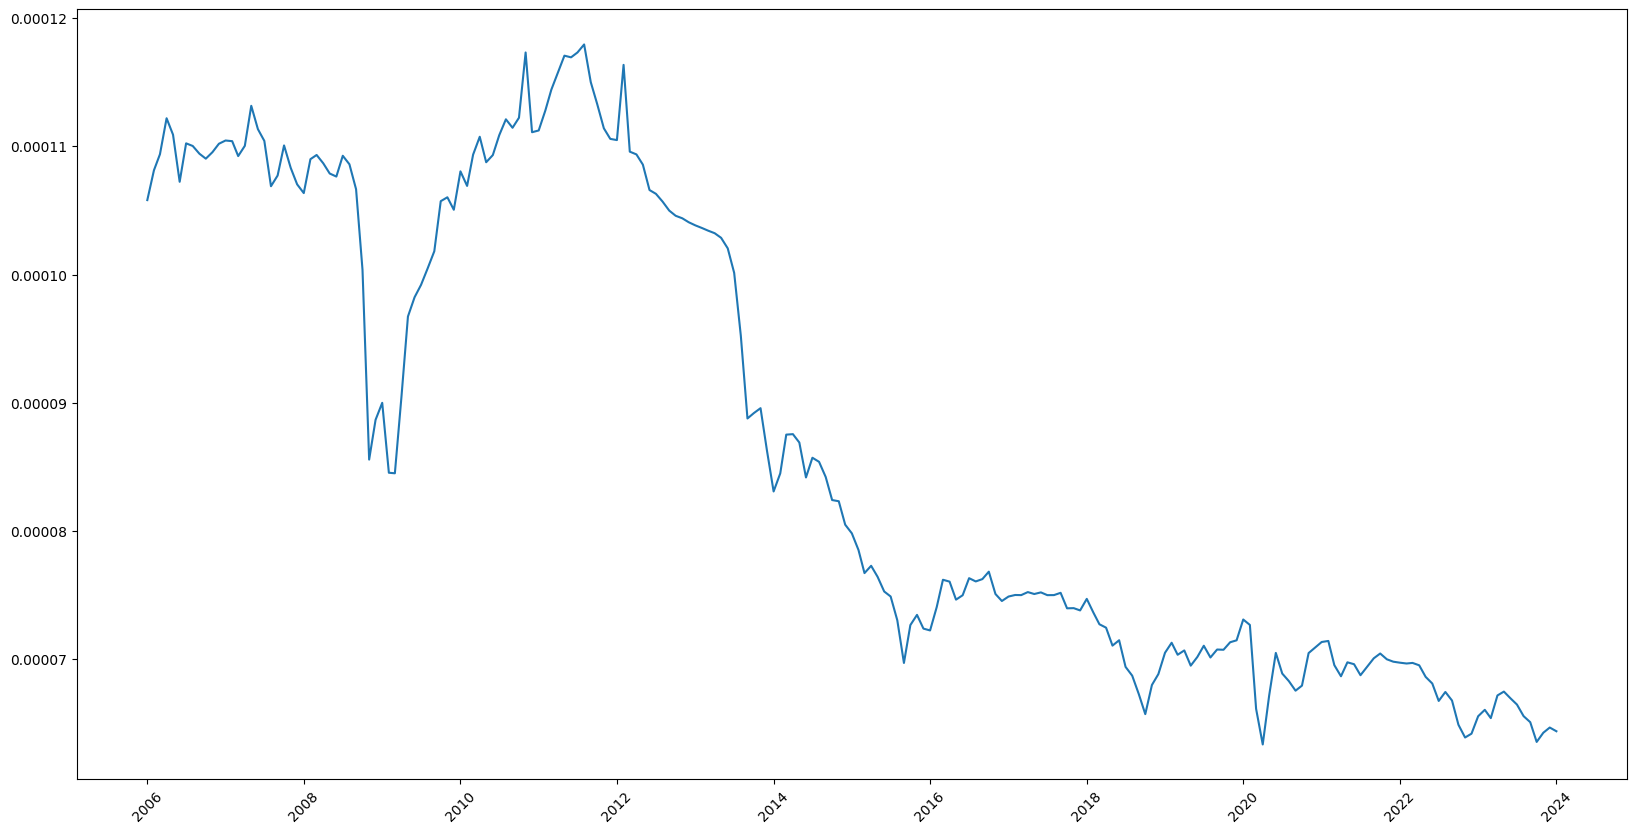

In [63]:
# plot the data with matplotlib
import matplotlib.pyplot as plt
df_with_average['Date'] = pd.to_datetime(df_with_average['Date'])
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(df_with_average['Date'],df_with_average['Close'])
plt.show()